Unique museum names in posts: ['Ulster Museum' 'American Folk Park' 'Transport Museum' 'Folk Museum']
Unique museum names in activity report: ['Ulster Folk Museum' 'Ulster Transport Museum' 'Ulster Museum'
 'Ulster American Folk Park' nan]
Unique platforms in posts: ['facebook' 'instagram']
Unique platforms in activity report: ['facebook' 'instagram']
Merged data shape before filtering: (124, 6)
Merged data shape after filtering: (13, 6)


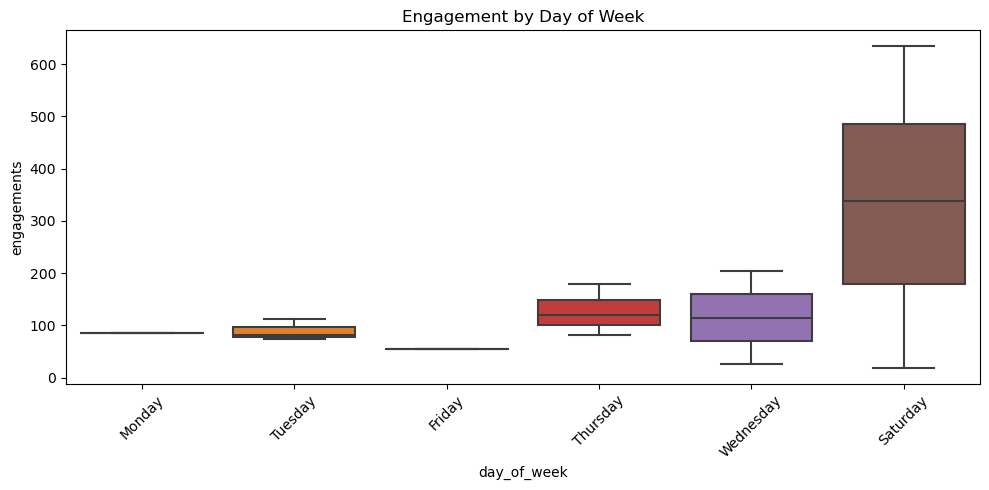

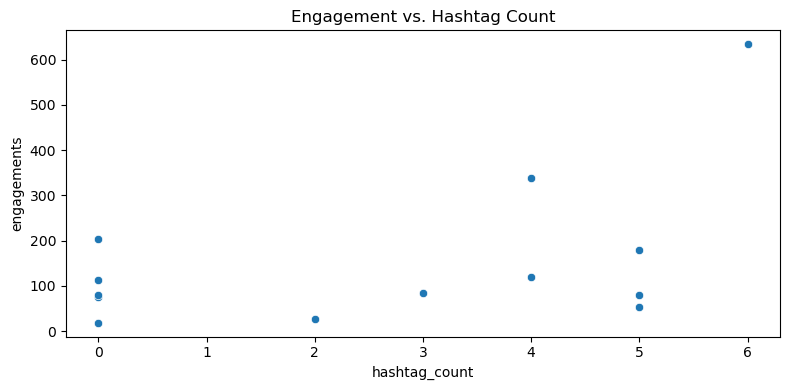

✅ Final dataset exported to: /Users/faitusjelinejoseph/Documents/Project/Social/final_merged_social_data.csv

🔹 Sample Output:
     post_date    museum_name  \
1   2024-04-15  Ulster Museum   
11  2024-04-30  Ulster Museum   
19  2024-05-24  Ulster Museum   
27  2024-07-04  Ulster Museum   
34  2024-07-31  Ulster Museum   

                                              caption  platform  engagements  \
1   Around 60 people from different communities to...  facebook         85.0   
11  Important visitor notice for Wednesday 1st May...  facebook         75.0   
19  Discover Caravaggio's 'The Supper at Emmaus', ...  facebook         54.0   
27  The Supper at Emmaus by Caravaggio, depicts th...  facebook        120.0   
34  Go for Gold! Congratulations to Daniel Wiffen,...  facebook        204.0   

      reach  hashtag_count day_of_week  month  sentiment  
1    1059.0              3      Monday      4     0.9758  
11   2228.0              0     Tuesday      4     0.5423  
19   2401.0     

In [6]:
only one record in the final output post_date	museum_name	caption	platform	engagements	reach	hashtag_count	hour_of_day	day_of_week	month	sentiment
10/30/24	Ulster Museum	your own rag wreath and explore rag rugs in our collection ‚Üí link in bio! #UlsterFolkMuseum #MakingChristmas	Instagram	26	988	2	0	Wednesday	10	0




✅ Unique museum names in post data: ['Ulster Museum' 'American Folk Park' 'Transport Museum' 'Folk Museum']
✅ Unique platforms in post data: ['facebook' 'instagram']
✅ Unique museum names in activity report: ['UFM' 'UTM' 'UM' 'UAFP' 'NMNI' 'UM ']
✅ Unique platforms in activity report: ['facebook' 'instagram']
⚠️ Unmatched rows (no engagement found):
      post_date         museum_name   platform
0    2024-04-11       Ulster Museum   facebook
1    2024-04-15       Ulster Museum   facebook
2    2024-04-17  American Folk Park   facebook
3    2024-04-18    Transport Museum   facebook
4    2024-04-20  American Folk Park   facebook
..          ...                 ...        ...
117  2025-03-16       Ulster Museum  instagram
120  2024-11-26       Ulster Museum  instagram
121  2024-10-30       Ulster Museum  instagram
122  2024-08-09       Ulster Museum  instagram
123  2024-05-03       Ulster Museum  instagram

[116 rows x 3 columns]
✅ Final merged rows: (0, 6)
No data available for visualizat

Merged rows (before dropna): (124, 6)
Merged rows (after dropna): (13, 6)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/faitusjelinejoseph/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


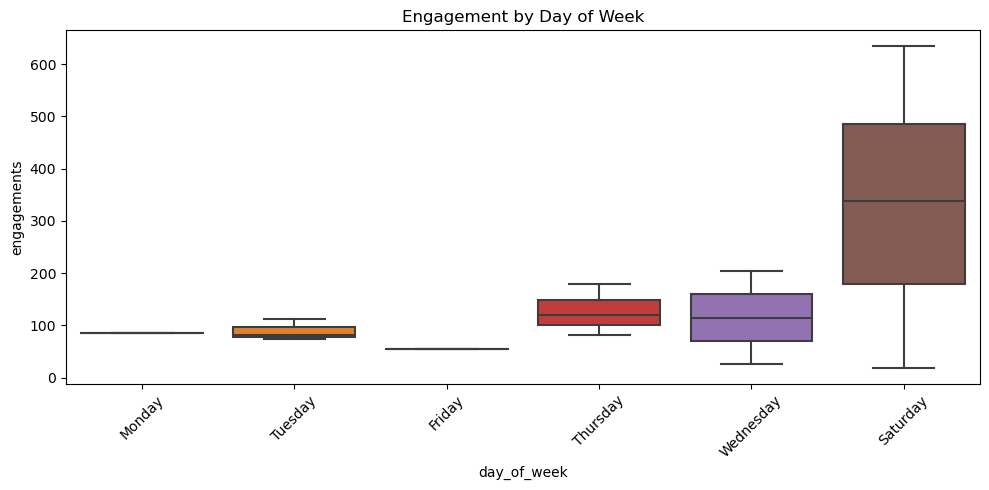

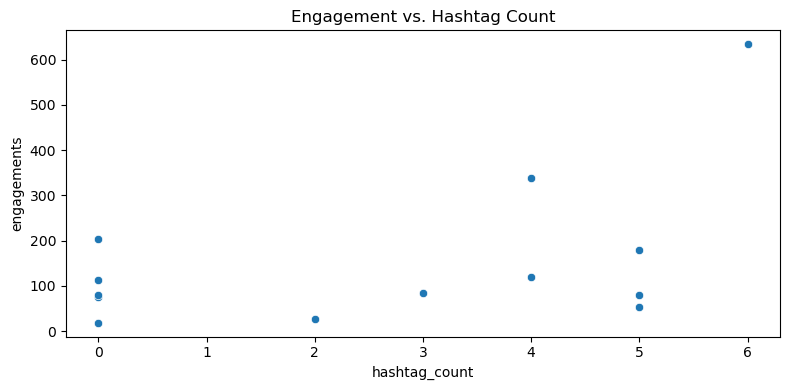

Final dataset exported to: final_merged_social_data.csv

 Sample Output:
     post_date    museum_name  \
1   2024-04-15  Ulster Museum   
11  2024-04-30  Ulster Museum   
19  2024-05-24  Ulster Museum   
27  2024-07-04  Ulster Museum   
34  2024-07-31  Ulster Museum   

                                              caption  platform  engagements  \
1   Around 60 people from different communities to...  facebook         85.0   
11  Important visitor notice for Wednesday 1st May...  facebook         75.0   
19  Discover Caravaggio's 'The Supper at Emmaus', ...  facebook         54.0   
27  The Supper at Emmaus by Caravaggio, depicts th...  facebook        120.0   
34  Go for Gold! Congratulations to Daniel Wiffen,...  facebook        204.0   

      reach  hashtag_count day_of_week  month  sentiment  
1    1059.0              3      Monday      4     0.9758  
11   2228.0              0     Tuesday      4     0.5423  
19   2401.0              5      Friday      5     0.6597  
27   7320.0

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# 1. Load Data
# -----------------------------
fb_path = "/Users/faitusjelinejoseph/Documents/Project/Social/Final_Facebook_Posts_With_Captions.xlsx"
ig_path = "/Users/faitusjelinejoseph/Documents/Project/Social/Instagram captions.xlsx"
report_path = "/Users/faitusjelinejoseph/Documents/Project/Social/Digital Engagement Report 2024-25.xlsx"

fb_df = pd.read_excel(fb_path, sheet_name='Sheet1')
ig_df = pd.read_excel(ig_path, sheet_name='Sheet1')
report_data = pd.read_excel(report_path, sheet_name=None)
activity_df = report_data['Social Activity Tracker']

# -----------------------------
# 2. Clean Facebook & Instagram
# -----------------------------
fb_df_cleaned = fb_df.rename(columns={
    'Post Date': 'post_date',
    'Museum Name': 'museum_name',
    'Formatted Facebook Caption': 'caption'
})
fb_df_cleaned['platform'] = 'facebook'

ig_df_cleaned = ig_df.rename(columns={
    'Date Posted': 'post_date',
    'Museum Site': 'museum_name',
    'Full Caption': 'caption'
})
ig_df_cleaned['platform'] = 'instagram'

fb_df_cleaned = fb_df_cleaned[['post_date', 'museum_name', 'caption', 'platform']]
ig_df_cleaned = ig_df_cleaned[['post_date', 'museum_name', 'caption', 'platform']]
combined_posts = pd.concat([fb_df_cleaned, ig_df_cleaned], ignore_index=True)

combined_posts['post_date'] = pd.to_datetime(combined_posts['post_date'], errors='coerce').dt.date
combined_posts = combined_posts.dropna(subset=['caption', 'post_date'])

# -----------------------------
# 3. Clean Engagement Report
# -----------------------------
activity_df_cleaned = activity_df.rename(columns={
    'Day': 'day',
    'Month': 'month',
    'Site': 'site',
    'Content Type': 'content_type',
    'Total Active Engagements (Like, Comment, Share, Video >15s)': 'engagements',
    'Total Reach': 'reach'
}).dropna(subset=['site', 'month'])

activity_df_cleaned = activity_df_cleaned[~activity_df_cleaned['site'].isin(['NNMI'])]

month_str_to_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
activity_df_cleaned['month'] = activity_df_cleaned['month'].map(month_str_to_num)
activity_df_cleaned['day'] = activity_df_cleaned['day'].fillna(15).astype(int)
activity_df_cleaned['post_date'] = pd.to_datetime({
    'year': 2024,
    'month': activity_df_cleaned['month'],
    'day': activity_df_cleaned['day']
}, errors='coerce').dt.date

site_to_museum = {
    'UM': 'Ulster Museum',
    'UTM': 'Ulster Transport Museum',
    'UAFP': 'Ulster American Folk Park',
    'AFP': 'Ulster American Folk Park',
    'UFM': 'Ulster Folk Museum'
}
activity_df_cleaned['museum_name'] = activity_df_cleaned['site'].map(site_to_museum)
activity_df_cleaned['platform'] = activity_df_cleaned['content_type'].apply(
    lambda x: 'facebook' if isinstance(x, str) and 'Facebook' in x else 'instagram'
)

# -----------------------------
# 4. Merge Datasets
# -----------------------------
merged_df = pd.merge(
    combined_posts,
    activity_df_cleaned[['post_date', 'museum_name', 'platform', 'engagements', 'reach']],
    on=['post_date', 'museum_name', 'platform'],
    how='left'
)
print("Merged rows (before dropna):", merged_df.shape)

merged_df = merged_df.dropna(subset=['engagements'])
print("Merged rows (after dropna):", merged_df.shape)

# -----------------------------
# 5. Feature Engineering
# -----------------------------
merged_df['hashtag_count'] = merged_df['caption'].fillna('').apply(lambda x: x.count('#'))
merged_df['hour_of_day'] = 0  # No timestamp info
merged_df['day_of_week'] = pd.to_datetime(merged_df['post_date']).dt.day_name()
merged_df['month'] = pd.to_datetime(merged_df['post_date']).dt.month

# Sentiment Analysis
nltk.download('vader_lexicon')  # <- Only needed once
sia = SentimentIntensityAnalyzer()
merged_df['sentiment'] = merged_df['caption'].fillna('').apply(lambda x: sia.polarity_scores(x)['compound'])

# -----------------------------
# 6. Visualizations
# -----------------------------
if not merged_df.empty:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='day_of_week', y='engagements', data=merged_df)
    plt.title('Engagement by Day of Week')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.scatterplot(x='hashtag_count', y='engagements', data=merged_df)
    plt.title('Engagement vs. Hashtag Count')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for visualization.")

# -----------------------------
# 7. Export Cleaned Dataset
# -----------------------------
merged_df.to_csv("/Users/faitusjelinejoseph/Documents/Project/Social/final_merged_social_data.csv", index=False)
print("Final dataset exported to: final_merged_social_data.csv")

# -----------------------------
# 8. Preview
# -----------------------------
print("\n Sample Output:")
print(merged_df[['post_date', 'museum_name', 'caption', 'platform', 'engagements', 'reach', 'hashtag_count', 'day_of_week', 'month', 'sentiment']].head())
